In [34]:
import pandas as pd


In [35]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\Samarth Sharma\AppData\Local\Temp\ipykernel_16664\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [38]:
df.drop('Cabin', axis=1, inplace=True)

In [39]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\Samarth Sharma\AppData\Local\Temp\ipykernel_16664\3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [40]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

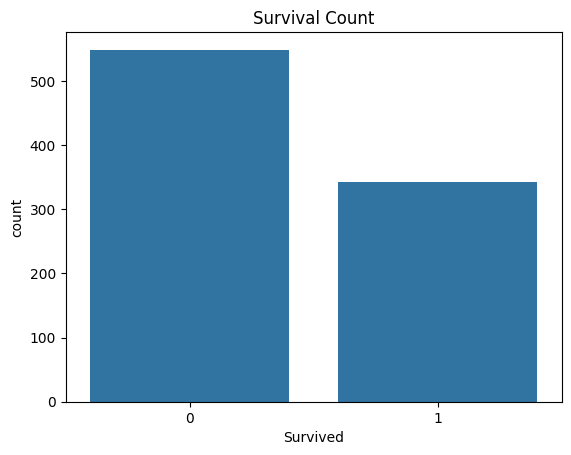

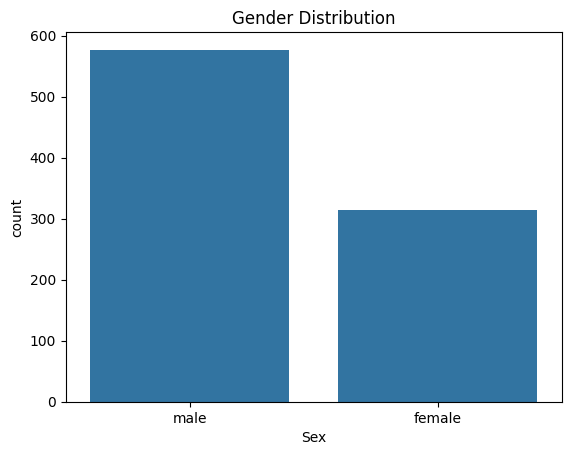

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of Survivors
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.show()

# Gender Distribution
sns.countplot(data=df, x='Sex')
plt.title('Gender Distribution')
plt.show()

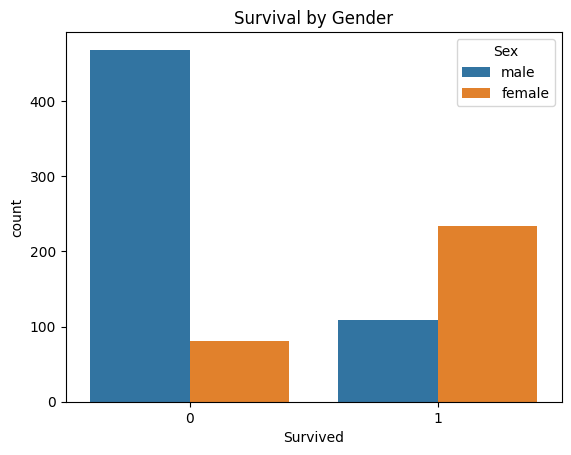

In [42]:
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Survival by Gender')
plt.show()

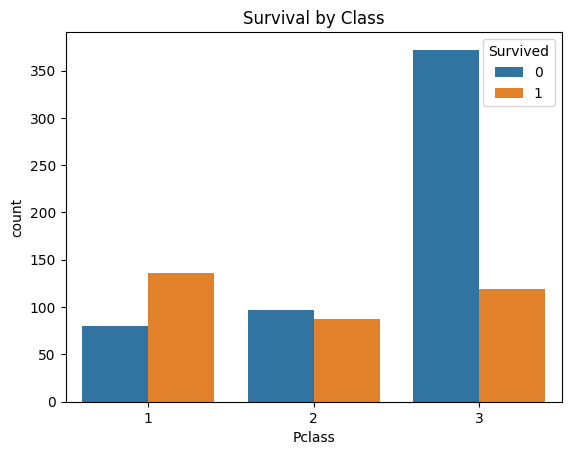

In [43]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Class')
plt.show()

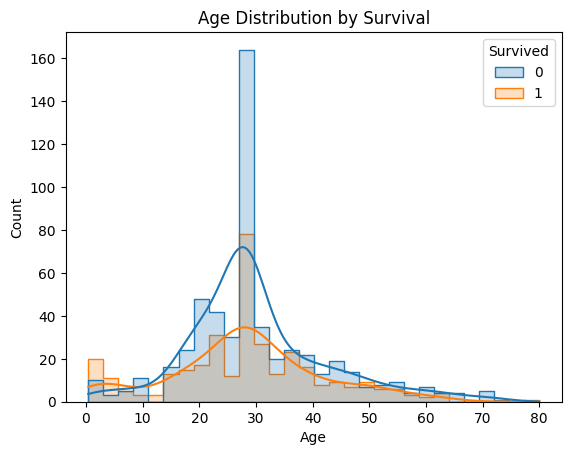

In [44]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True, element="step")
plt.title('Age Distribution by Survival')
plt.show()

In [45]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

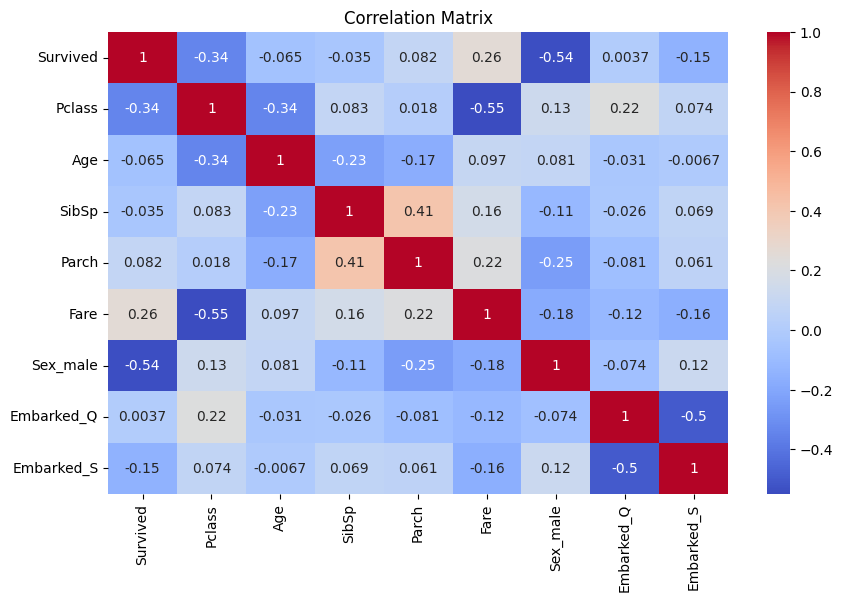

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Key Insights

Females had a higher chance of survival compared to males.

Passengers in 1st class had higher survival rates than those in 2nd or 3rd class.

Younger passengers had slightly better survival chances.

Embarked location and fare amount also show some influence.